<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E5%86%B3%E7%AD%96%E6%A0%91_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import GridSearchCV


In [2]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'


In [4]:
path = 'iris.data'  
data = pd.read_csv(path, header=None)
data.info()
x = data[np.arange(0,4)]  #按特征索引
print(x)
y = pd.Categorical(data[4]).codes

print ("总样本数目：%d；特征属性数目：%d" % x.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
总样本数目：150；特征属性数目：4


In [5]:
# a = np.random.random((2,4))
# b = np.array([(1,2,3),(4,5,6),(7,8,9)])
# print(a.shape)
# print(type(a))
# print(type(b),b.shape)
# print(a)
# print(a[-1])
# print(a[:,-1])
# print(a[0,:],a[0],b[1:])

In [6]:
#数据划分
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：120, 测试数据集样本数目：30


In [7]:
ss = MinMaxScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)

print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [-1.19444444 -0.83333333 -0.18965517 -0.04166667]
原始数据各个特征属性的缩放数据值: [0.27777778 0.41666667 0.17241379 0.41666667]


In [8]:
#特征选择：从已有的特征中选出影响目标值最大的特征属性   从高纬度降低到低维

ch2 = SelectKBest(chi2, k=3) #在当前案例中，是使用selectKbest这个api从这四个原始属性中选择3个

x_train = ch2.fit_transform(x_train, y_train)
x_test = ch2.transform(x_test)

select_name_index = ch2.get_support(indices=True)
print ("对类别判断影响最大的三个特征属性分布是:", ch2.get_support(indices=False))


对类别判断影响最大的三个特征属性分布是: [ True False  True  True]


In [9]:
print(select_name_index)

[0 2 3]


In [10]:
#降维：对于数据而言，特征多的时候，在构建模型的时候，会比较复杂，这时候会考虑降维
#常用方法： PCA:主成分分析（无监督）。LDA：线性判别分析（有监督）


pca = PCA(n_components=2)  #降维=2

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)



In [11]:
#模型构建
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
#模型训练
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test) 

# from sklearn.externals.six import StringIO
# with open("iris.dot", 'w') as f:
#     f = tree.export_graphviz(model, out_file=f)



In [12]:
#模型的评估
y_test2 = y_test.reshape(-1)
result = (y_test2 == y_test_hat)
print (result)
print ("准确率:%.2f%%" % (np.mean(result) * 100))

print ("Score：", model.score(x_test, y_test))
print ("Classes:", model.classes_)

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
准确率:96.67%
Score： 0.9666666666666667
Classes: [0 1 2]


In [13]:
#画图
N = 100  
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] #测试点
print(x_show)
y_show_hat = model.predict(x_show) 

y_show_hat = y_show_hat.reshape(x1.shape)  
print (y_show_hat.shape)
y_show_hat[0]



[[-0.80794216 -0.28147536]
 [-0.79147488 -0.28147536]
 [-0.77500761 -0.28147536]
 ...
 [ 0.78938329  0.34710191]
 [ 0.80585056  0.34710191]
 [ 0.82231783  0.34710191]]
(100, 100)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


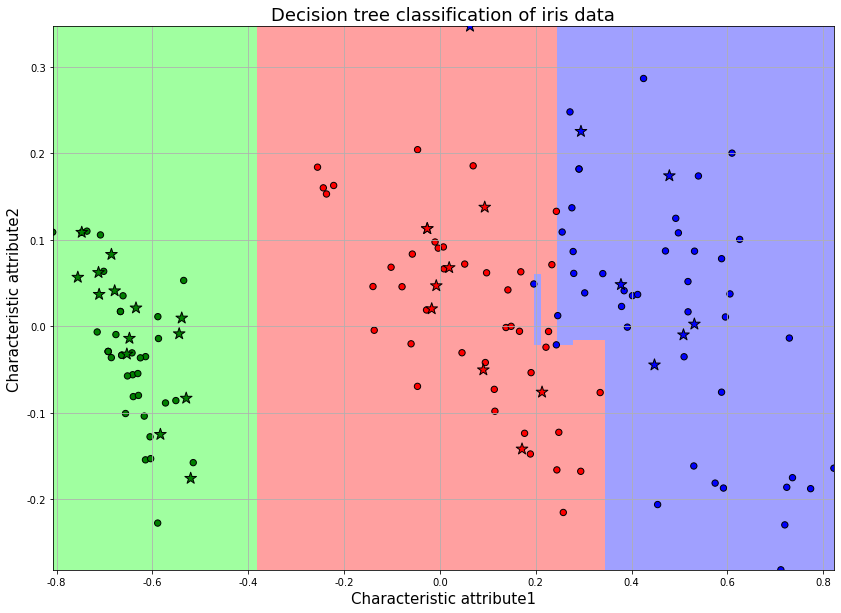

In [14]:
#画图
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w',figsize=(14,10))#背景色
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light) #划分区域
#画测试数据的信息
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
#画训练数据的信息
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'Characteristic attribute1', fontsize=15)
plt.ylabel(u'Characteristic attribute2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'Decision tree classification of iris data', fontsize=18)
plt.show()



In [16]:
pipe = Pipeline([
            ('mms', MinMaxScaler()),
            ('skb', SelectKBest(chi2)),
            ('pca', PCA()),
            ('decision', DecisionTreeClassifier())
        ])

# 参数
parameters = {
    "skb__k": [1,2,3,4],
    "pca__n_components": [0.5,0.99],
    "decision__criterion": ["gini", "entropy"],
    "decision__max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1
#网格交叉验证
gscv = GridSearchCV(pipe, param_grid=parameters,cv=3)
#模型训练
gscv.fit(x_train2, y_train2)
#算法最优
print("最优参数列表:",gscv.best_params_)
print ("score值：",gscv.best_score_)

y_test_hat2 = gscv.predict(x_test2)




最优参数列表: {'decision__criterion': 'gini', 'decision__max_depth': 6, 'pca__n_components': 0.99, 'skb__k': 3}
score值： 0.9583333333333334


In [18]:
mms_best = MinMaxScaler()
skb_best = SelectKBest(chi2, k=2)
pca_best = PCA(n_components=0.5)
decision3 = DecisionTreeClassifier(criterion='gini', max_depth=2)

x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = pca_best.fit_transform(skb_best.fit_transform(mms_best.fit_transform(x_train3, y_train3), y_train3))
x_test3 = pca_best.transform(skb_best.transform(mms_best.transform(x_test3)))
decision3.fit(x_train3, y_train3)

print("正确率:", decision3.score(x_test3, y_test3))



正确率: 1.0


1深度，训练集正确率0.65714
1深度，测试集正确率0.55556
2深度，训练集正确率0.79048
2深度，测试集正确率0.73333
3深度，训练集正确率0.80952
3深度，测试集正确率0.77778
4深度，训练集正确率0.81905
4深度，测试集正确率0.73333
5深度，训练集正确率0.87619
5深度，测试集正确率0.68889
6深度，训练集正确率0.88571
6深度，测试集正确率0.68889
7深度，训练集正确率0.89524
7深度，测试集正确率0.68889
8深度，训练集正确率0.91429
8深度，测试集正确率0.66667
9深度，训练集正确率0.92381
9深度，测试集正确率0.66667
10深度，训练集正确率0.92381
10深度，测试集正确率0.66667
11深度，训练集正确率0.92381
11深度，测试集正确率0.66667
12深度，训练集正确率0.92381
12深度，测试集正确率0.66667
13深度，训练集正确率0.92381
13深度，测试集正确率0.66667
14深度，训练集正确率0.92381
14深度，测试集正确率0.66667


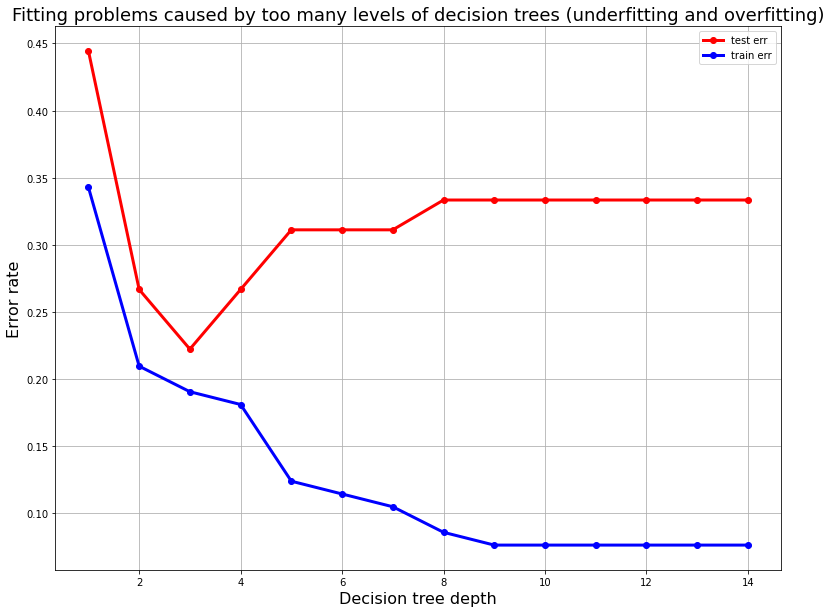

In [33]:

#基于原始数据前3列比较一下决策树在不同深度情况下的错误率

x_train4, x_test4, y_train4, y_test4 = train_test_split(x.iloc[:, :2], y, train_size=0.7, random_state=14)

depths = np.arange(1, 15)
err_list = []
err_list_0=[]
for d in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d, min_samples_split = 3)  #剪枝
    clf.fit(x_train4, y_train4)
    score_0 = clf.score(x_train4, y_train4)
    score = clf.score(x_test4, y_test4)
    err_0 = 1-score_0
    err = 1 - score
    err_list_0.append(err_0)
    err_list.append(err)
    print("%d深度，训练集正确率%.5f"% (d,score_0))
    print("%d深度，测试集正确率%.5f" % (d, score))

## 画图
plt.figure(facecolor='w',figsize=(13,10))
l1 = plt.plot(depths, err_list, 'ro-', lw=3)
l2 = plt.plot(depths, err_list_0, 'bo-', lw=3)
plt.legend(['test err','train err'])
plt.xlabel(u'Decision tree depth', fontsize=16)
plt.ylabel(u'Error rate', fontsize=16)
plt.grid(True)
plt.title(u'Fitting problems caused by too many levels of decision trees (underfitting and overfitting)', fontsize=18)
plt.show()

特征：   花萼长度  +  花萼宽度
	预测正确数目： 127
	准确率: 84.67%
特征：   花萼长度  +  花瓣长度
	预测正确数目： 148
	准确率: 98.67%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣长度
	预测正确数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 149
	准确率: 99.33%


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23485 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29923 missing from current font.
  font.set_

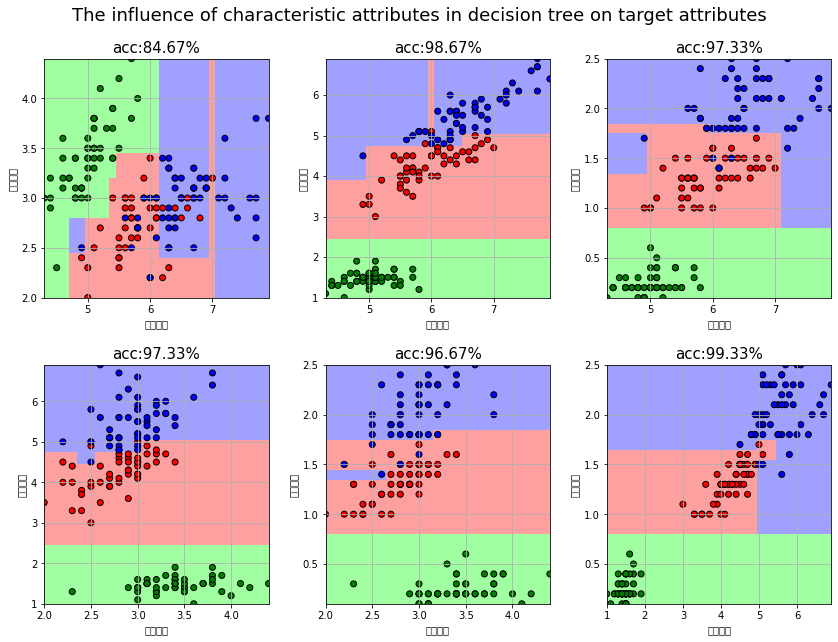

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = 'iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x_prime = data[list(range(4))]
y = pd.Categorical(data[4]).codes

#进行特征比较
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(12, 9), facecolor='w')
for i, pair in enumerate(feature_pairs):
#获取数据
    x = x_prime[pair]
#决策树学习
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    clf.fit(x, y)
    
    y_hat = clf.predict(x)
    score = clf.score(x, y)
    y2 = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)   #统计预测正确的个数
    print ('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print ('\t预测正确数目：', c)
    print ('\t准确率: %.2f%%' % (score*100))

    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.dstack((x1.flat, x2.flat))[0]  # 测试点
    

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=10)
    plt.ylabel(iris_feature[pair[1]], fontsize=10)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
    plt.title(u'acc:%.2f%%' % (score * 100), fontdict={'fontsize':15})
plt.suptitle(u'The influence of characteristic attributes in decision tree on target attributes', fontsize=18, y = 1)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()